In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [164]:
centro = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='centro')
sur = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='sur')
noreste = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='noreste')
noroeste = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='noroeste')
sureste = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='sureste')
suroeste = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='suroeste')
norte = pd.read_excel('df_AgrupacionZonaV6.xlsx',sheet_name='noroeste')

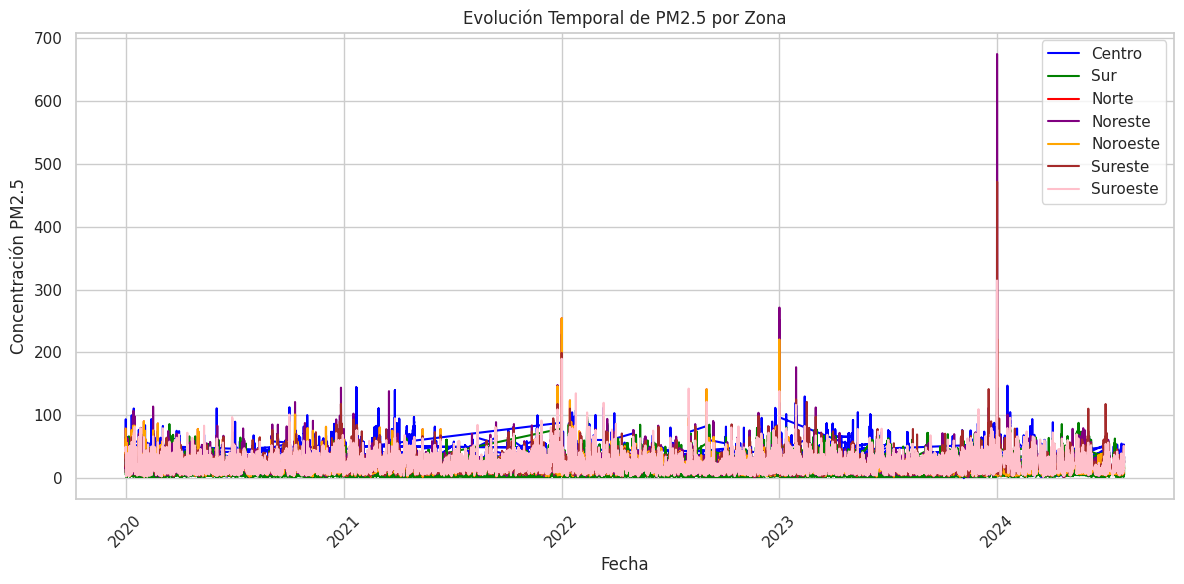

In [165]:
centroPM25=centro[['date', 'PM2.5']].copy()
surPM25=sur[['date', 'PM2.5']].copy()
nortePM25=norte[['date', 'PM2.5']].copy()
norestePM25=noreste[['date', 'PM2.5']].copy()
noroestePM25=noroeste[['date', 'PM2.5']].copy()
surestePM25=sureste[['date', 'PM2.5']].copy()
suroestePM25=suroeste[['date', 'PM2.5']].copy()

plt.figure(figsize=(12, 6))

# Graficar cada zona con un color diferente
plt.plot(centroPM25['date'], centroPM25['PM2.5'], label='Centro', color='blue')
plt.plot(surPM25['date'], surPM25['PM2.5'], label='Sur', color='green')
plt.plot(nortePM25['date'], nortePM25['PM2.5'], label='Norte', color='red')
plt.plot(norestePM25['date'], norestePM25['PM2.5'], label='Noreste', color='purple')
plt.plot(noroestePM25['date'], noroestePM25['PM2.5'], label='Noroeste', color='orange')
plt.plot(surestePM25['date'], surestePM25['PM2.5'], label='Sureste', color='brown')
plt.plot(suroestePM25['date'], suroestePM25['PM2.5'], label='Suroeste', color='pink')

# Agregar títulos y leyenda
plt.title('Evolución Temporal de PM2.5 por Zona')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

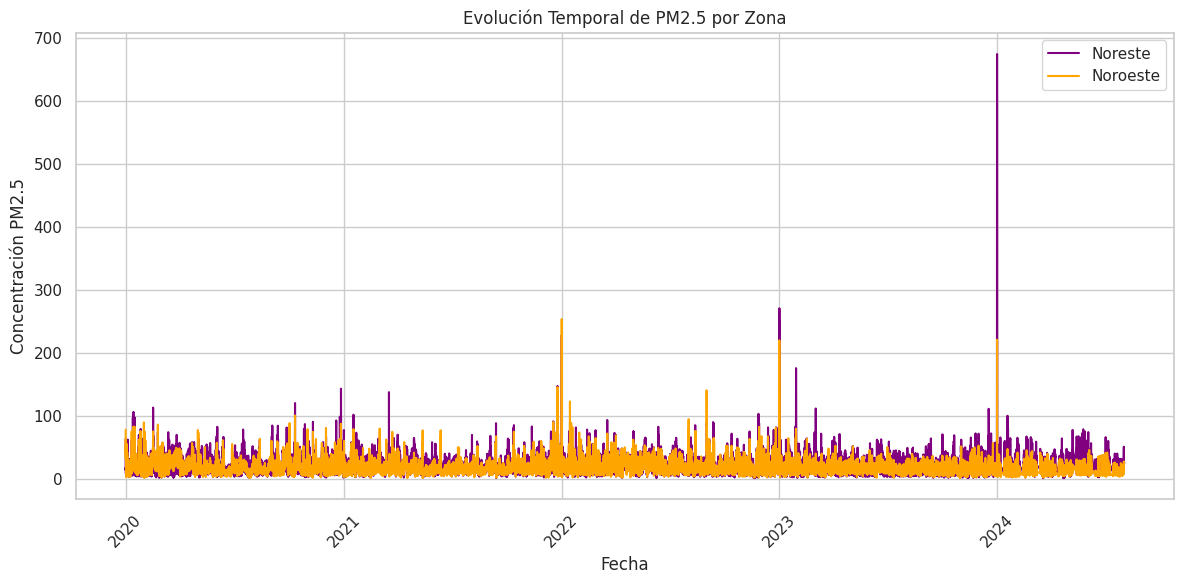

In [166]:
centroPM25=centro[['date', 'PM2.5']].copy()
surPM25=sur[['date', 'PM2.5']].copy()
nortePM25=norte[['date', 'PM2.5']].copy()
norestePM25=noreste[['date', 'PM2.5']].copy()
noroestePM25=noroeste[['date', 'PM2.5']].copy()
surestePM25=sureste[['date', 'PM2.5']].copy()
suroestePM25=suroeste[['date', 'PM2.5']].copy()

plt.figure(figsize=(12, 6))

# Graficar cada zona con un color diferente
plt.plot(norestePM25['date'], norestePM25['PM2.5'], label='Noreste', color='purple')
plt.plot(noroestePM25['date'], noroestePM25['PM2.5'], label='Noroeste', color='orange')


# Agregar títulos y leyenda
plt.title('Evolución Temporal de PM2.5 por Zona')
plt.xlabel('Fecha')
plt.ylabel('Concentración PM2.5')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

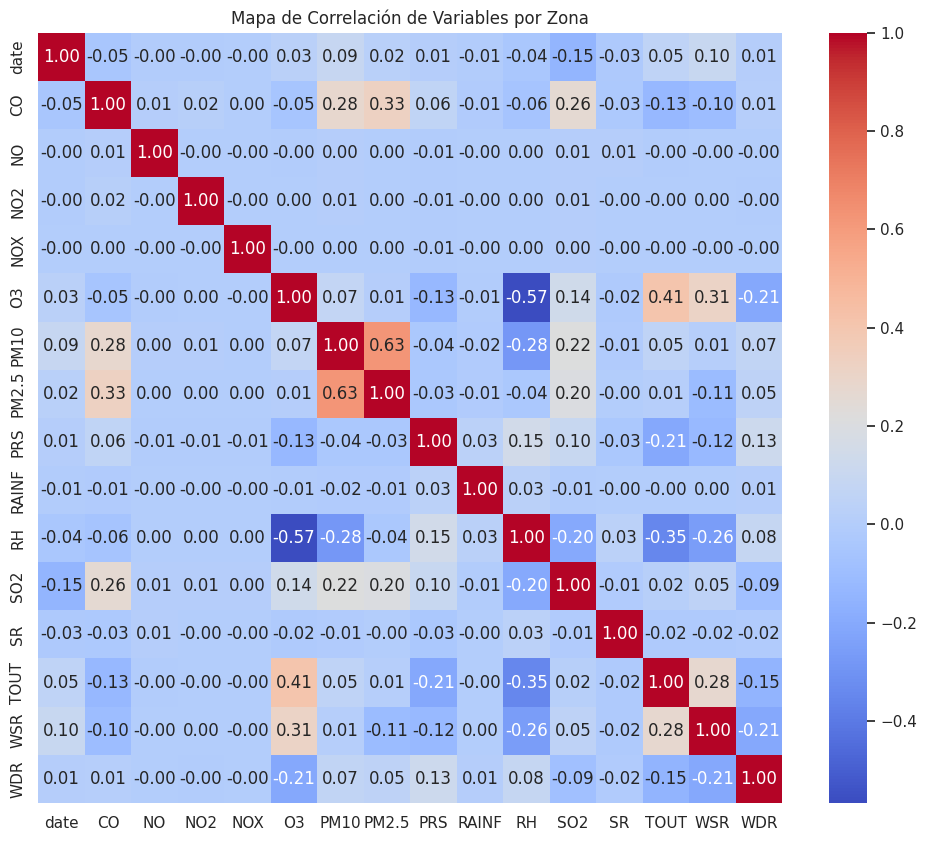

In [167]:
all_zones = pd.concat([centro, sur, noreste, noroeste, sureste, suroeste], ignore_index=True)

# Calcular la matriz de correlación
correlation_matrix = all_zones.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Variables por Zona')
plt.show()


## Análisis factorial (Modulo 1)
Este método puede identificar factores latentes que agrupan variables observables (como los diferentes contaminantes) en conjuntos que pueden influir en la concentración de PM2.5. Ayudará a descubrir relaciones más profundas entre los contaminantes y las variables meteorológicas.

In [168]:
!pip install factor_analyzer

#### Centro

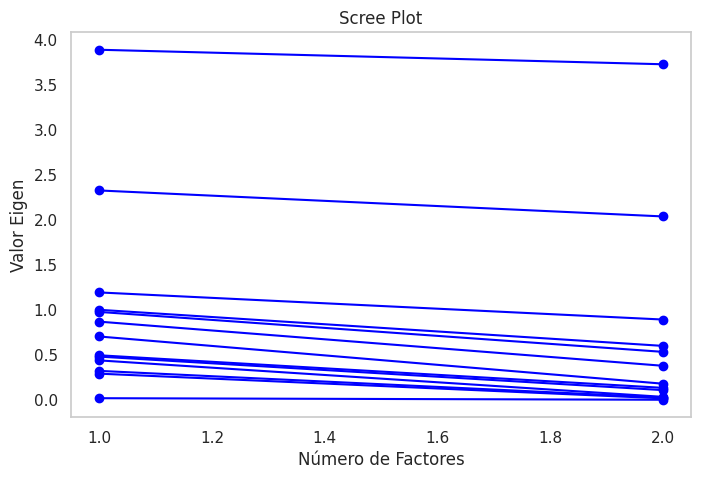

       Factor 1  Factor 2  Factor 3
CO    -0.059205 -0.229767  0.412806
NO     0.675967 -0.244106  0.214305
NO2    0.771395 -0.189777  0.294115
NOX    0.998394 -0.188017  0.176318
O3    -0.202470  0.717508  0.133235
PM10   0.355726  0.124283  0.645480
PM2.5  0.285500 -0.121539  0.604533
RH    -0.064183 -0.654262 -0.237086
SO2    0.213018  0.087567  0.469817
SR    -0.004959  0.038508 -0.013582
TOUT  -0.134275  0.659887 -0.046271
WSR   -0.198713  0.711170 -0.165640
WDR    0.126192 -0.242191  0.103282


In [169]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

centro_data = centro.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
centro_data = centro_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
centro_scaled = scaler.fit_transform(centro_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=centro_data.shape[1], rotation=None)
fa.fit(centro_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(centro_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

El Scree Plot muestra que el primer factor tiene un valor propio (eigenvalue) superior a 1, lo que indica que este factor explica más varianza que cualquier variable individual. A partir de este gráfico, podrías decidir mantener dos factores, ya que los valores propios de los primeros dos factores son significativamente mayores que 1, mientras que los valores para los factores posteriores son menores y no aportan tanta varianza. Por lo tanto, basándonos en el Scree Plot, podríamos retener 2 factores:

Factor 1: Relacionado con los contaminantes gaseosos como NO, NO2, y NOX.

Factor 2: Relacionado con las condiciones meteorológicas, como humedad relativa, temperatura y velocidad del viento.

Factor 3: Relacionado con partículas en suspensión como PM10 y PM2.5.

#### Sur

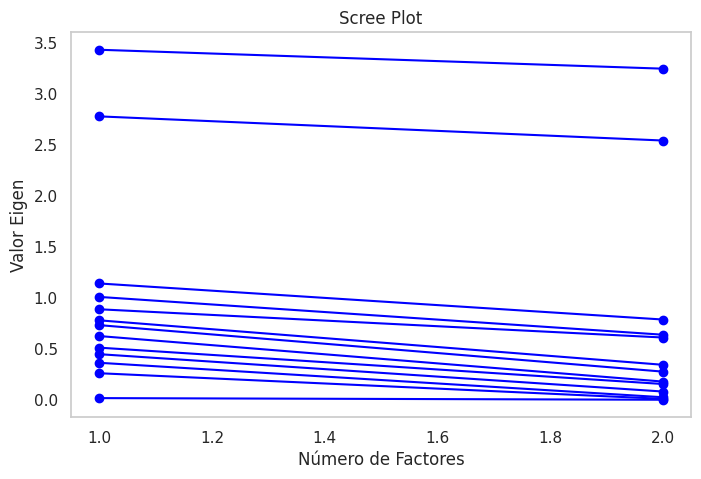

       Factor 1  Factor 2  Factor 3
CO     0.200255 -0.071842  0.360561
NO     0.604807 -0.147647  0.150771
NO2    0.776808 -0.202903  0.155624
NOX    1.005196 -0.180482  0.139915
O3    -0.277152  0.721173  0.254101
PM10   0.093295  0.127448  0.757130
PM2.5  0.060357  0.100517  0.559137
RH     0.038982 -0.603411 -0.353624
SO2    0.240436  0.231006  0.326670
SR     0.034295  0.621779  0.270798
TOUT  -0.208653  0.703391  0.122896
WSR   -0.128949  0.464446 -0.084205
WDR    0.043113 -0.254291  0.060348


In [170]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

sur_data = sur.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
sur_data = sur_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
sur_scaled = scaler.fit_transform(sur_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=sur_data.shape[1], rotation=None)
fa.fit(sur_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(sur_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, el primer factor tiene un valor propio alrededor de 3.5, que es claramente mayor que 1. El segundo factor también es significativo, pero los valores propios de los factores posteriores son más bajos. Esto sugiere que 2 factores son los más importantes para retener, ya que los otros factores no aportan mucha variación adicional.

Factor 1: Relacionado con la contaminación por gases como NOX, NO2, NO y SO2.

Factor 2: Relacionado con las condiciones meteorológicas, incluyendo humedad, temperatura y radiación solar.

Factor 3: Relacionado con las partículas en suspensión, PM10 y PM2.5, que afectan directamente la calidad del aire.


### Norte

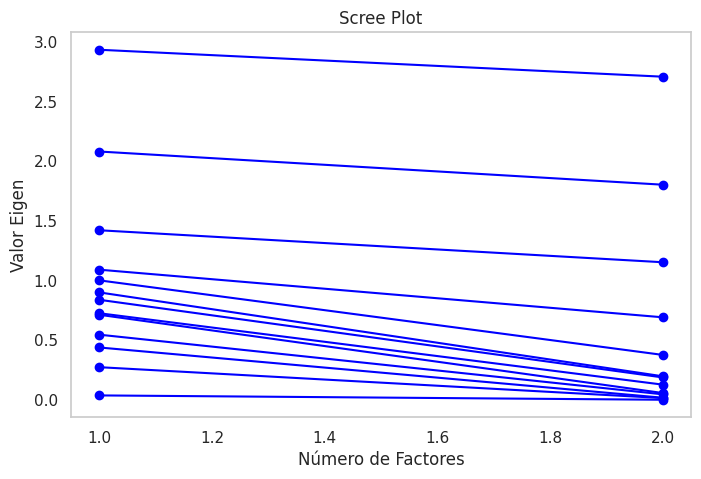

       Factor 1  Factor 2  Factor 3
CO     0.209086  0.059640  0.373612
NO     0.990287  0.180096  0.014584
NO2    0.066278  0.118722  0.217649
NOX    0.869302  0.259106  0.205357
O3    -0.000999 -0.806432 -0.014973
PM10   0.165638 -0.164687  0.823891
PM2.5  0.165991  0.103594  0.651518
RH    -0.076639  0.720616 -0.218591
SO2    0.323727 -0.062624  0.088122
SR     0.005470  0.005102 -0.016118
TOUT  -0.050758 -0.296375 -0.016728
WSR   -0.151903 -0.460428 -0.101077
WDR    0.043586  0.369006  0.330987


In [171]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

norte_data = norte.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
norte_data = norte_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
norte_scaled = scaler.fit_transform(norte_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=norte_data.shape[1], rotation=None)
fa.fit(norte_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(norte_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, el primer factor tiene un valor propio superior a 2, mientras que el segundo y el tercero tienen valores más bajos. Esto sugiere que 2 factores son los más significativos para explicar la mayor parte de la variabilidad de los datos. Los factores posteriores no aportan mucho valor, lo que indica que el modelo puede ser simplificado con dos factores principales.

Factor 1: Relacionado con la contaminación por gases y partículas en suspensión (NOX, NO, CO, PM10, PM2.5).

Factor 2: Relacionado con las condiciones meteorológicas (ozono, humedad, temperatura) que afectan la dispersión de los contaminantes.

Factor 3: Relacionado con las partículas finas en el aire (PM10 y PM2.5), que son cruciales para la calidad del aire y la salud pública.

### Noreste

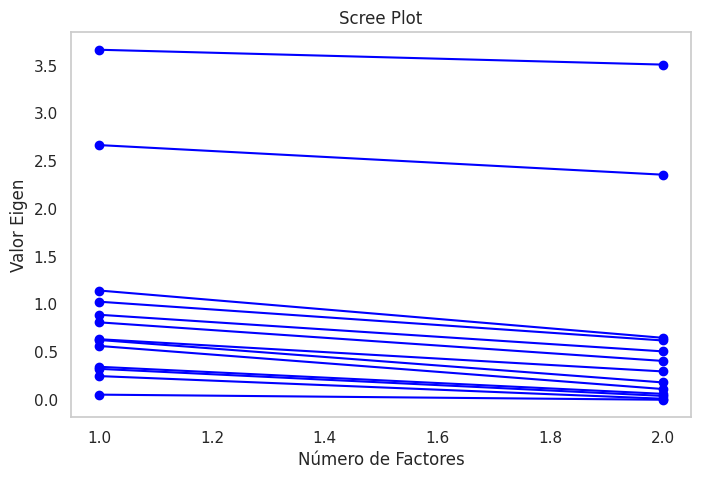

       Factor 1  Factor 2  Factor 3
CO     0.277332 -0.088946  0.554501
NO     0.756938 -0.227160 -0.020229
NO2    0.722968 -0.182338  0.219001
NOX    0.944762 -0.246812  0.077962
O3    -0.179124  0.789702  0.111769
PM10   0.668539  0.244885  0.195936
PM2.5  0.580122  0.122999  0.259434
RH    -0.142431 -0.701377 -0.127118
SO2    0.027566  0.197841  0.389519
SR    -0.052825  0.611404  0.189416
TOUT  -0.074022  0.612923 -0.131327
WSR   -0.086160  0.331299 -0.123903
WDR    0.156324 -0.079263  0.169189


In [172]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

noreste_data = noreste.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
noreste_data = noreste_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
noreste_scaled = scaler.fit_transform(noreste_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=noreste_data.shape[1], rotation=None)
fa.fit(noreste_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(noreste_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, el primer factor tiene un valor propio superior a 2, mientras que el segundo y el tercero tienen valores más bajos. Esto sugiere que 2 factores son los más significativos para explicar la mayor parte de la variabilidad de los datos. Los factores posteriores no aportan mucho valor, lo que indica que el modelo puede ser simplificado con dos factores principales.

Factor 1: Relacionado con la contaminación por gases y partículas en suspensión (NOX, NO, CO, PM10, PM2.5).

Factor 2: Relacionado con las condiciones meteorológicas (ozono, humedad, temperatura) que afectan la dispersión de los contaminantes.

Factor 3: Relacionado con las partículas finas en el aire (PM10 y PM2.5), que son cruciales para la calidad del aire y la salud pública.

### Noroeste

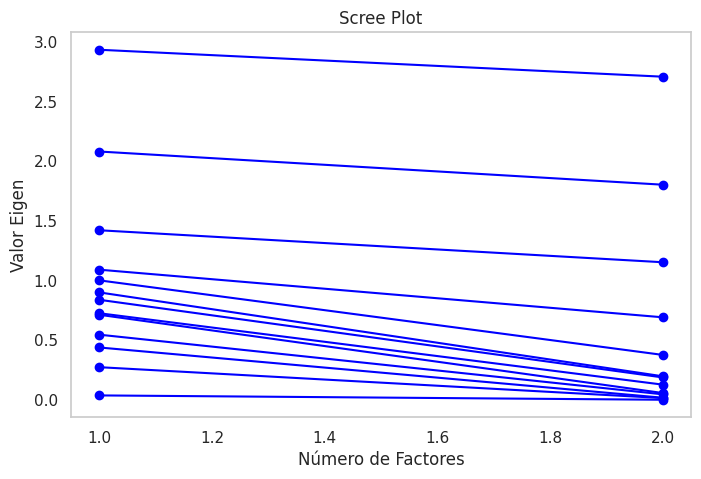

       Factor 1  Factor 2  Factor 3
CO     0.209086  0.059640  0.373612
NO     0.990287  0.180096  0.014584
NO2    0.066278  0.118722  0.217649
NOX    0.869302  0.259106  0.205357
O3    -0.000999 -0.806432 -0.014973
PM10   0.165638 -0.164687  0.823891
PM2.5  0.165991  0.103594  0.651518
RH    -0.076639  0.720616 -0.218591
SO2    0.323727 -0.062624  0.088122
SR     0.005470  0.005102 -0.016118
TOUT  -0.050758 -0.296375 -0.016728
WSR   -0.151903 -0.460428 -0.101077
WDR    0.043586  0.369006  0.330987


In [173]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

noroeste_data = noroeste.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
noroeste_data = noroeste_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
noroeste_scaled = scaler.fit_transform(noroeste_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=noroeste_data.shape[1], rotation=None)
fa.fit(noroeste_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(noroeste_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, el primer factor tiene un valor propio superior a 2, mientras que el segundo y el tercero tienen valores más bajos. Esto sugiere que 2 factores son los más significativos para explicar la mayor parte de la variabilidad de los datos. Los factores posteriores no aportan mucho valor, lo que indica que el modelo puede ser simplificado con dos factores principales.

Factor 1: Relacionado con la contaminación por gases y partículas en suspensión (NOX, NO, CO, PM10, PM2.5).

Factor 2: Relacionado con las condiciones meteorológicas (ozono, humedad, temperatura) que afectan la dispersión de los contaminantes.

Factor 3: Relacionado con las partículas finas en el aire (PM10 y PM2.5), que son cruciales para la calidad del aire y la salud pública.

### Sureste

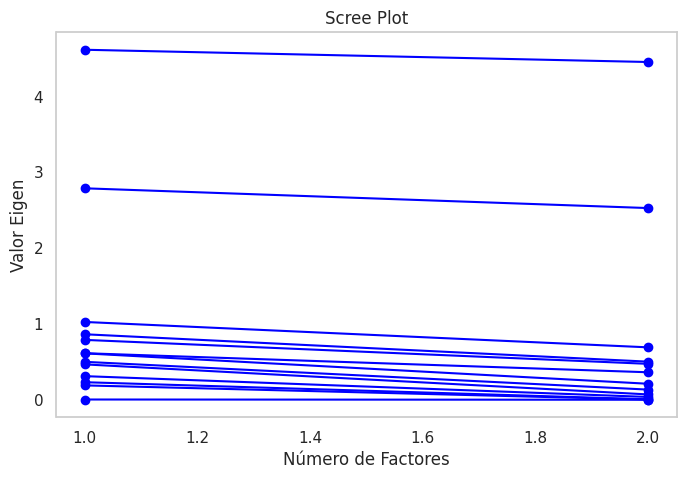

       Factor 1  Factor 2  Factor 3
CO     0.499095  0.056224  0.271492
NO     0.820333 -0.072593  0.286453
NO2    0.697230 -0.118744  0.389657
NOX    0.940046 -0.075496  0.329411
O3    -0.281945  0.828210 -0.054785
PM10   0.328250  0.188396  0.794627
PM2.5  0.307232  0.043121  0.770153
RH     0.030704 -0.756756 -0.132245
SO2    0.098256  0.405837  0.047969
SR    -0.087005  0.589024  0.019213
TOUT  -0.451854  0.512964  0.137435
WSR   -0.417529  0.452032 -0.064469
WDR    0.480400 -0.147485  0.053444


In [174]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

sureste_data = sureste.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
sureste_data = sureste_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
sureste_scaled = scaler.fit_transform(sureste_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=sureste_data.shape[1], rotation=None)
fa.fit(sureste_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(sureste_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, el primer factor tiene un valor propio superior a 4, mientras que el segundo casi 3. Esto sugiere que 2 factores son los más significativos para explicar la mayor parte de la variabilidad de los datos. Los factores posteriores no aportan mucho valor, lo que indica que el modelo puede ser simplificado con dos factores principales.

Factor 1: Relacionado con la contaminación por gases y partículas finas (NOX, NO, NO2, CO, PM10, PM2.5).

Factor 2: Relacionado con las condiciones meteorológicas y la formación de ozono (O3), influyendo en la calidad del aire a través de la radiación solar y la humedad.

Factor 3: Relacionado con las partículas en el aire (PM10 y PM2.5), que son especialmente perjudiciales para la salud respiratoria.

### Suroeste

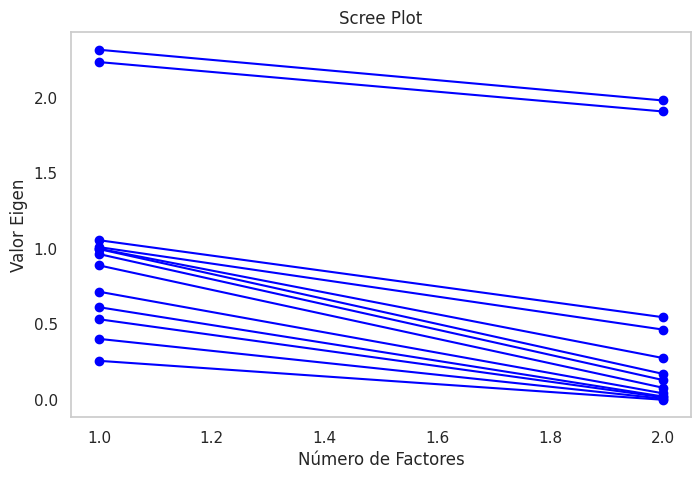

       Factor 1  Factor 2  Factor 3
CO    -0.050932  0.355581  0.534206
NO    -0.009998  0.001358  0.028691
NO2    0.004893  0.006318  0.061200
NOX   -0.001520 -0.005631  0.012318
O3     0.808830  0.000368  0.041854
PM10   0.104308  0.847248  0.065560
PM2.5 -0.111133  0.736945  0.132689
RH    -0.621619 -0.137491 -0.111652
SO2    0.233235  0.263147  0.492643
SR    -0.102260 -0.047623 -0.104964
TOUT   0.696973 -0.008301 -0.256457
WSR    0.331768 -0.158086 -0.090859
WDR   -0.289302  0.245458 -0.077246


In [175]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

suroeste_data = suroeste.drop(columns=['date']) # Eliminar la columna 'date' ya que no es una variable numérica

# Seleccionar las variables relevantes (ignorar las que no son relevantes, por ejemplo, PRS, RAINF)
variables = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
suroeste_data = suroeste_data[variables]

# Normalizar los datos (esto es crucial para el análisis factorial)
scaler = StandardScaler()
suroeste_scaled = scaler.fit_transform(suroeste_data)

# Determinar el número de factores usando el Scree Plot y Kaiser Criterion (eigenvalues > 1)
fa = FactorAnalyzer(n_factors=suroeste_data.shape[1], rotation=None)
fa.fit(suroeste_scaled)

# Eigenvalues para cada factor
eigenvalues = fa.get_eigenvalues()

# Scree plot para decidir cuántos factores retener
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Eigen')
plt.grid()
plt.show()

# Ahora ajustamos el análisis factorial con el número adecuado de factores
# Suponiendo que decidimos mantener 3 factores
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(suroeste_scaled)

# Mostrar los componentes factoriales (cargas)
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las cargas de cada variable en cada factor
factor_loadings_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])], index=variables)
print(factor_loadings_df)

En este Scree Plot, podemos observar los primeros 2 factores con valores por encima 2, estos 2 factores explican la mayor variabilidad de los datos. Los factores posteriores no aportan mucho valor, lo que indica que el modelo puede ser simplificado con dos factores principales.

Factor 1: Relacionado con el ozono (O3) y las condiciones meteorológicas (temperatura y humedad), influyendo en la calidad del aire.

Factor 2: Relacionado con contaminación por partículas finas (PM10, PM2.5).

Factor 3: Relacionado con la contaminación por gases (CO y SO2), típicamente asociados con la actividad industrial y el tráfico.

### Conclusión

1. Gases contaminantes:
En todas las regiones (centro, sur, norte, noreste, noroeste, sureste y suroeste), el primer factor está relacionado de manera importante con los gases contaminantes, como NOX, NO, CO, NO2 y SO2. Este factor es consistente en todas las regiones, sugiriendo que los gases como óxidos de nitrógeno (NOX) y monóxido de carbono (CO) tienen un impacto importante en la calidad del aire a nivel local.
Las regiones centro, sur y sureste destacan especialmente la importancia del NOX, NO, NO2 y SO2, lo que podría indicar una fuerte presencia de fuentes industriales o vehiculares en estas zonas.
2. Partículas en suspensión (PM10 y PM2.5):
PM10 y PM2.5 son relevantes en casi todas las regiones, especialmente en los factores 2 y 3, relacionados con la contaminación por partículas. Esto refleja su papel central en la calidad del aire y en la salud pública.
Las regiones norte, noreste, noroeste y suroeste muestran una clara asociación con la contaminación por partículas, ya que PM10 y PM2.5 están constantemente en los primeros factores. Esto podría indicar que estas regiones tienen fuentes de emisión de partículas más dominantes, ya sea por actividad vehicular o industrial.
3. Condiciones meteorológicas (humedad, temperatura y radiación solar):
Las condiciones meteorológicas (como humedad relativa, temperatura y radiación solar) influyen en la dispersión y formación de contaminantes, especialmente el ozono. Esto se observa en la relación entre ozono (O3) y las condiciones meteorológicas en factor 2 en la mayoría de las regiones.
Las regiones sur, sureste, y suroeste muestran una fuerte relación entre ozono y condiciones meteorológicas, lo que sugiere que la formación de ozono podría estar más influenciada por la radiación solar y la temperatura en esas zonas.
4. Generalidad del comportamiento:
A través de todas las regiones, dos factores principales son suficientes para explicar la mayor parte de la variabilidad de los datos: uno asociado con los contaminantes gaseosos y las partículas en suspensión, y otro con las condiciones meteorológicas que afectan la dispersión y formación de contaminantes.
El ozono aparece de manera destacada en las regiones donde la radiación solar es más intensa, como en el sureste y suroeste, lo que sugiere que la formación de ozono podría estar más vinculada con el clima en esas zonas.

Conclusión general:
Las regiones muestran un patrón consistente en términos de la influencia de gases contaminantes y partículas en suspensión sobre la calidad del aire, pero las condiciones meteorológicas juegan un papel más importante en algunas zonas, como el sur y sureste, donde la radiación solar y la humedad parecen tener una mayor influencia sobre la formación y dispersión de ozono. Sin embargo, en todas las regiones, los contaminantes gaseosos y las partículas finas son los principales factores que afectan la calidad del aire y representan riesgos para la salud pública.

Variables clave: Contaminantes gaseosos (NOX, NO, CO, NO2, SO2) y partículas en suspensión (PM10, PM2.5), así como condiciones meteorológicas (temperatura, humedad, radiación solar).


## Regresión multivariada (Modulo 2)

### Centro

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_centro = centro

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_centro[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_centro['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     4441.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:03   Log-Likelihood:            -1.6035e+05
No. Observations:               42287   AIC:                         3.207e+05
Df Residuals:                   42278   BIC:                         3.208e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1434      0.412    -17.329      0.0

### Norte

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_norte = norte

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_norte[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_norte['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2740.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:04   Log-Likelihood:            -1.1094e+05
No. Observations:               31461   AIC:                         2.219e+05
Df Residuals:                   31452   BIC:                         2.220e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2960      0.333     -6.899      0.0

### Noreste

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_noreste = noreste

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_noreste[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_noreste['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     4204.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:04   Log-Likelihood:            -1.1785e+05
No. Observations:               31460   AIC:                         2.357e+05
Df Residuals:                   31451   BIC:                         2.358e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0174      0.474    -29.591      0.0

### Noroeste

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_noroeste = noroeste

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_noroeste[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_noroeste['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2740.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:04   Log-Likelihood:            -1.1094e+05
No. Observations:               31461   AIC:                         2.219e+05
Df Residuals:                   31452   BIC:                         2.220e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2960      0.333     -6.899      0.0

### Sur

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_sur = sur

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_sur[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_sur['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     2509.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:04   Log-Likelihood:            -1.5295e+05
No. Observations:               42284   AIC:                         3.059e+05
Df Residuals:                   42275   BIC:                         3.060e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8712      0.363    -32.676      0.0

### Sureste

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_sureste = sureste

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_sureste[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_sureste['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     6021.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:05   Log-Likelihood:            -1.1178e+05
No. Observations:               31462   AIC:                         2.236e+05
Df Residuals:                   31453   BIC:                         2.236e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9711      0.506    -43.393      0.0

### Suroeste

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df_suroeste = suroeste

# Selecciona las variables predictoras (X) y la variable a predecir (y)
X = df_suroeste[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR']]
y = df_suroeste['PM2.5']

# Añadir una constante para el intercepto (bias) en el modelo
X = sm.add_constant(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con statsmodels
model = sm.OLS(y_train, X_train)

# Ajustar el modelo
results = model.fit()

# Ver el summary del modelo
print(results.summary())

# Hacer predicciones en el conjunto de prueba
y_pred = results.predict(X_test)

# Calcular el MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcular el RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Calcular el MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el R-squared (R²) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Imprimir las métricas de evaluación
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f'MAPE: {mape:.2f}%')

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     3724.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:58:05   Log-Likelihood:            -1.1444e+05
No. Observations:               31461   AIC:                         2.289e+05
Df Residuals:                   31452   BIC:                         2.290e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6290      0.366    -15.378      0.0

### Conclusión

En los modelos de regresión multivariada podemos ver unas medidas pococ alentadoras, al elto MAPE nos indica que este modelo no es capaz de hacer predicciones correctas de manera que a nosotros nos gustaría. Dado el alto MAPE en varias regiones y el bajo R² en el Sur, es probable que sea beneficioso buscar un modelo más adecuado. Los modelos actuales pueden no capturar la complejidad de los datos.

## Modelo de predicción

### Centro

In [323]:
df = centro.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

y_boxcox, fitted_lambda = stats.boxcox((df['PM2.5']+1e-20))

# Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=20,           # Profundidad máxima
    learning_rate=0.05,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 17.44%
Train MAE: 0.01901944137863896
Test MAE: 3.3252434939721116
Train Mean Squared Error: 0.005302471727610292
Test Mean Squared Error: 37.14036719710817
Train R^2: 0.9999749676553555
Test R^2: 0.8282688874245597


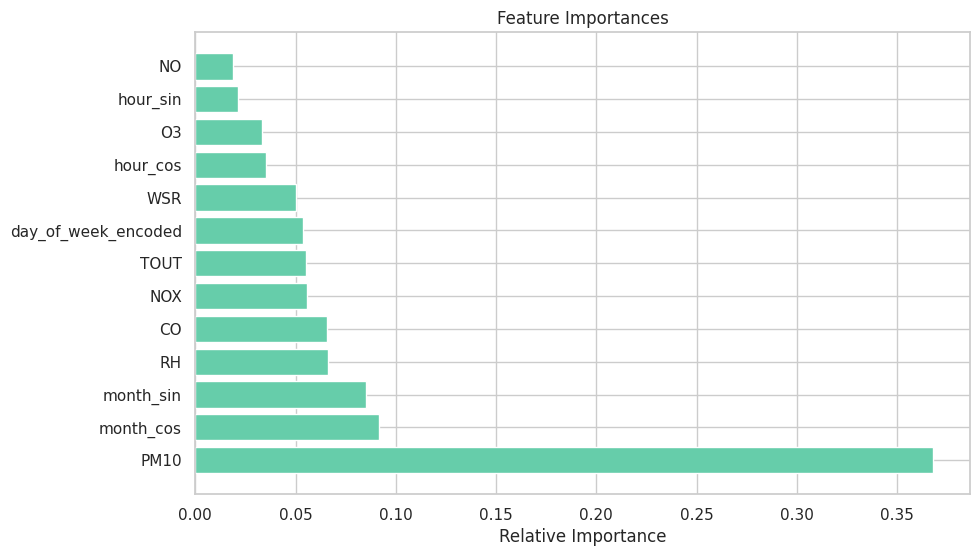

In [324]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

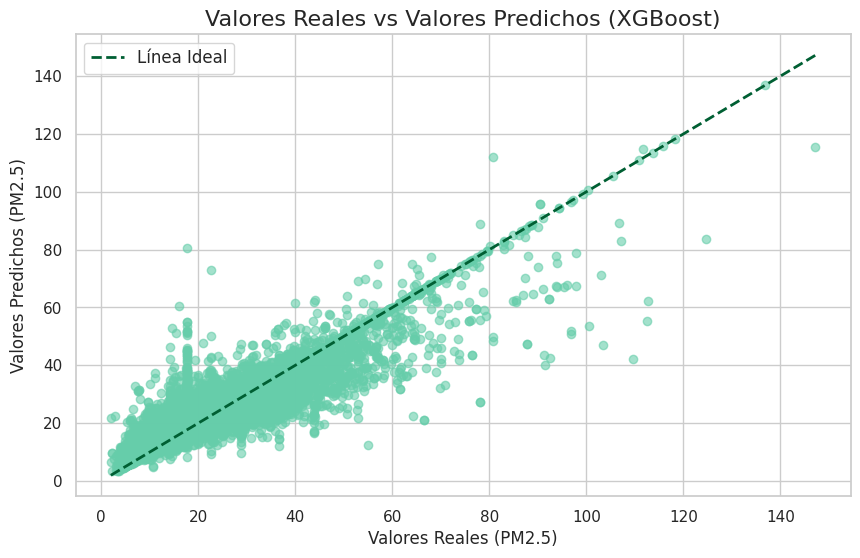

In [325]:
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

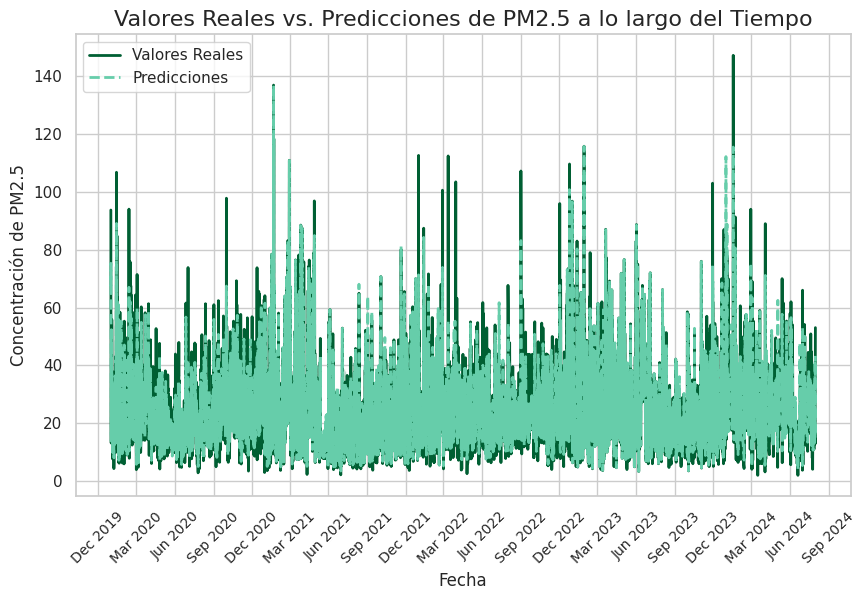

In [326]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

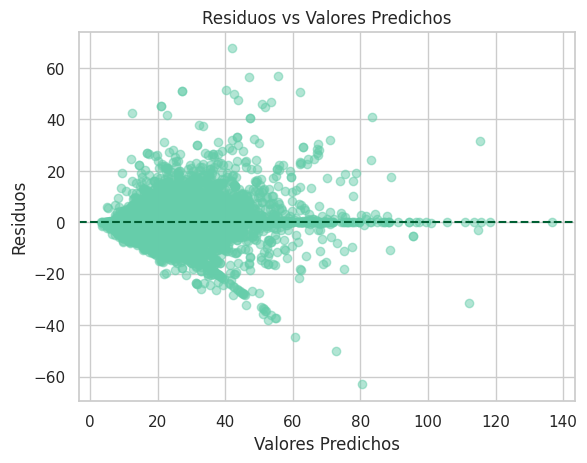

In [327]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


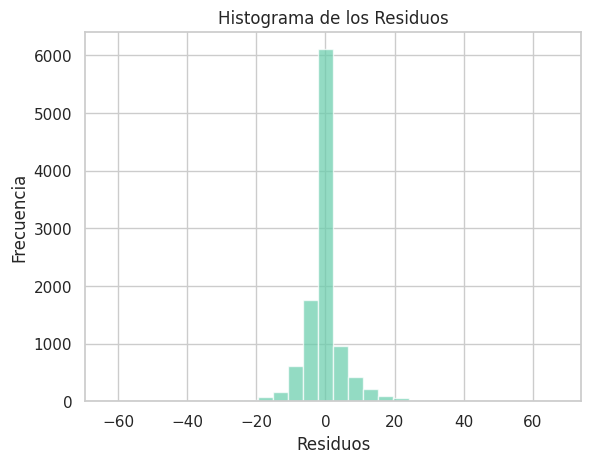

In [328]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Norte

In [329]:
# Cargar el archivo
df = norte.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Crear columnas de codificación temporal
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month
df['hour'] = df['Date'].dt.hour

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=20,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")

Mean Absolute Percentage Error (MAPE): 24.94%
Train MAE: 0.007449927454997202
Test MAE: 4.0232987523517405
Train Mean Squared Error: 0.00015694924402019747
Test Mean Squared Error: 35.79188756780665
Train R^2: 0.9999986336742511
Test R^2: 0.6969349603296644


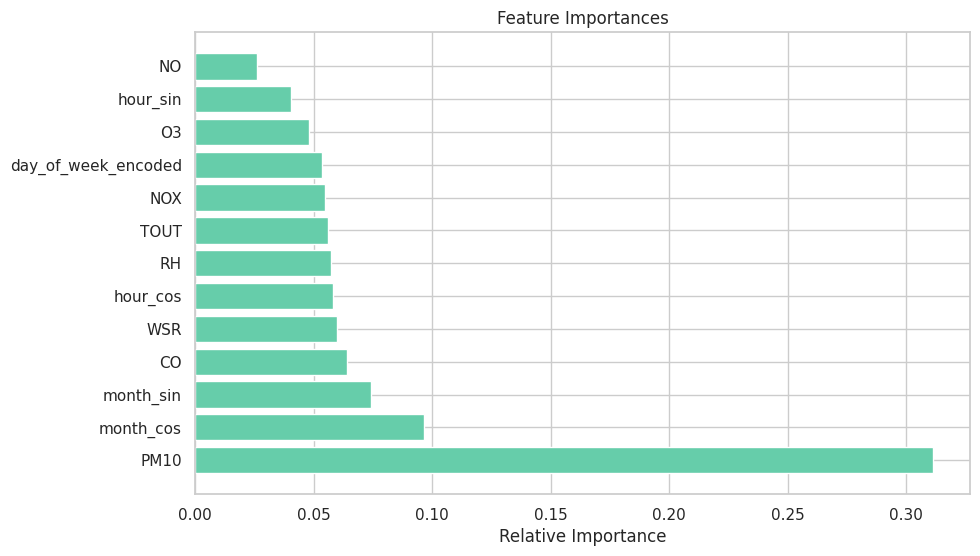

In [330]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

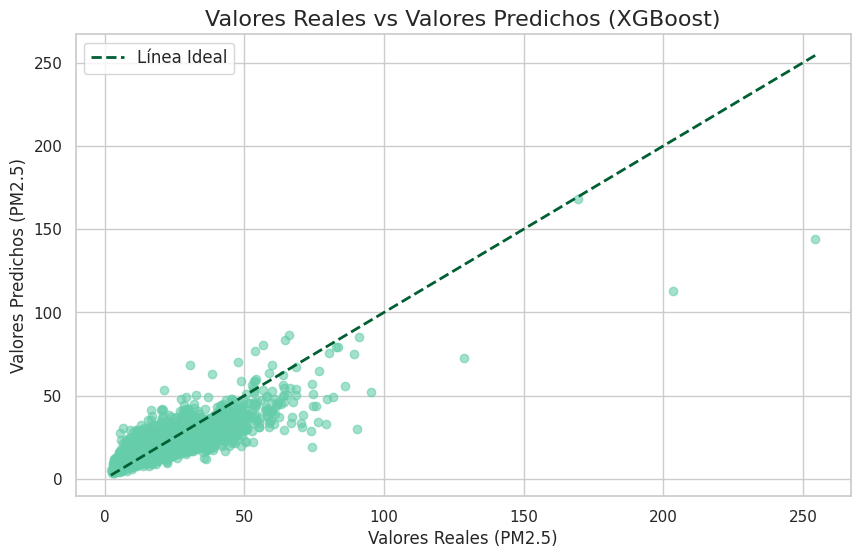

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

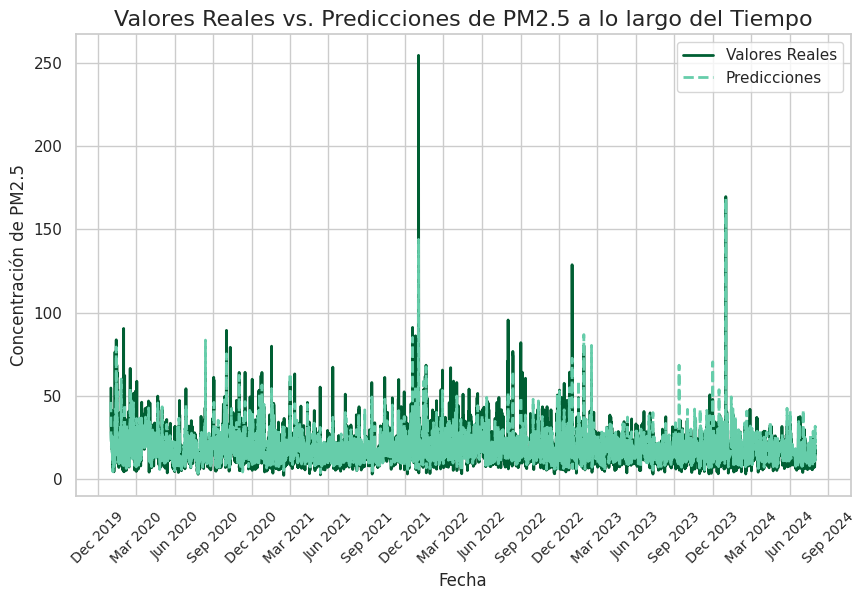

In [332]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

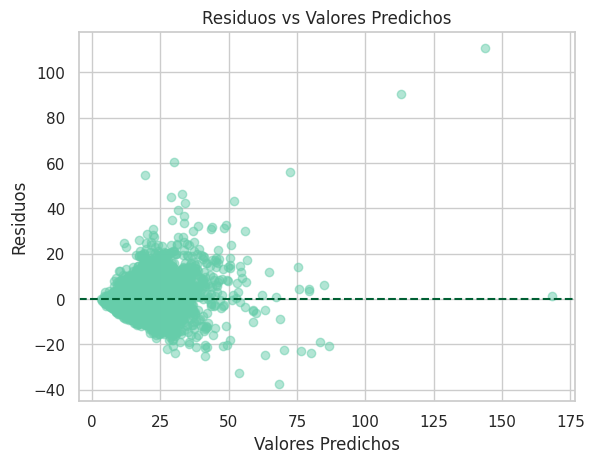

In [333]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


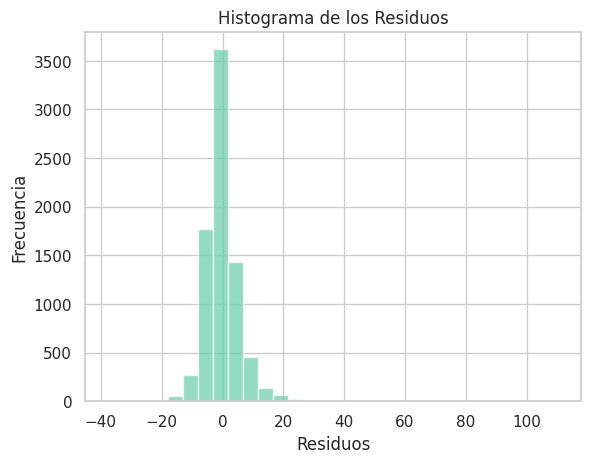

In [334]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Noreste

In [335]:
df = noreste.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=20,           # Profundidad máxima
    learning_rate=0.05,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 26.56%
Train MAE: 0.014494146581068974
Test MAE: 4.476506196405809
Train Mean Squared Error: 0.0005719932269022672
Test Mean Squared Error: 49.71267667755638
Train R^2: 0.9999973683231718
Test R^2: 0.7508968103238808


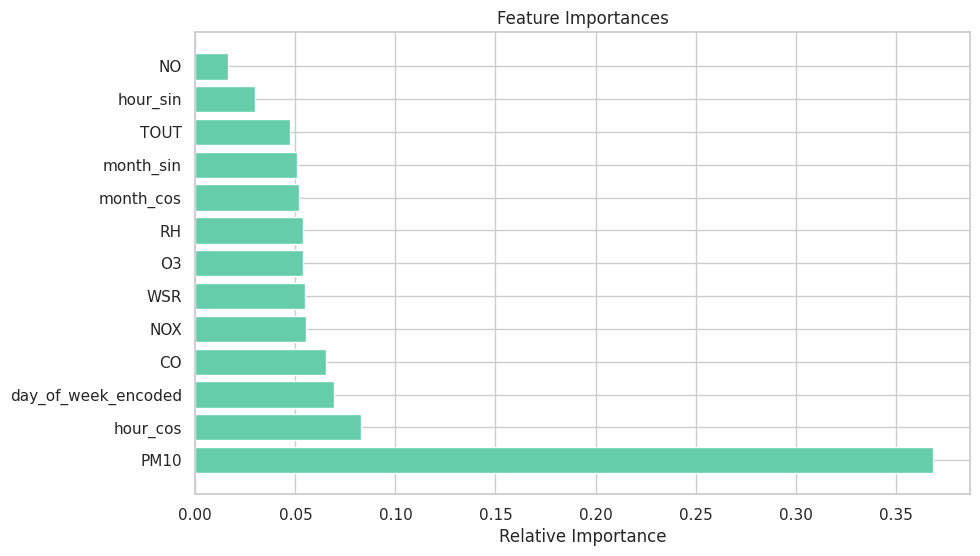

In [336]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

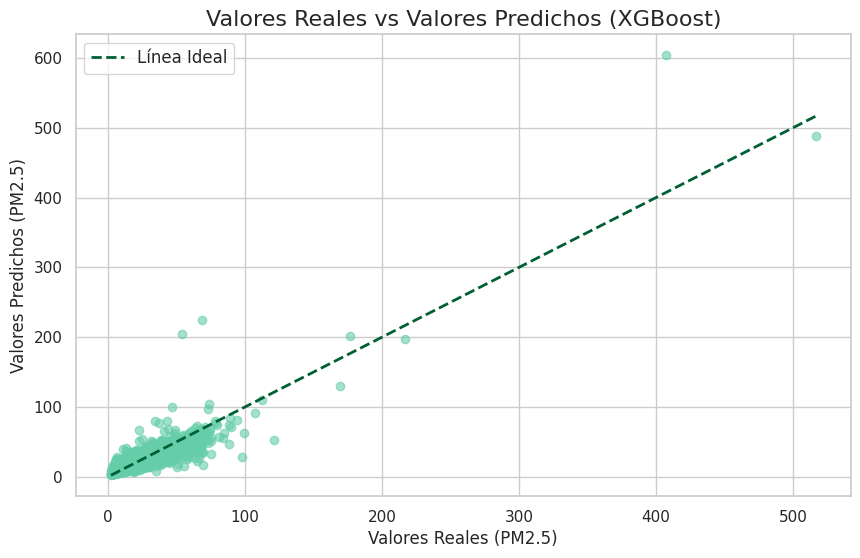

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

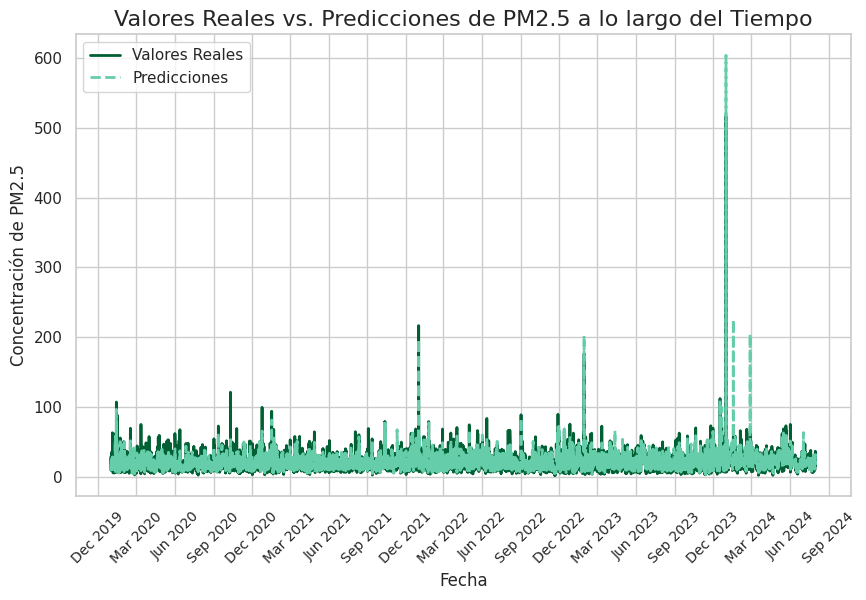

In [338]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

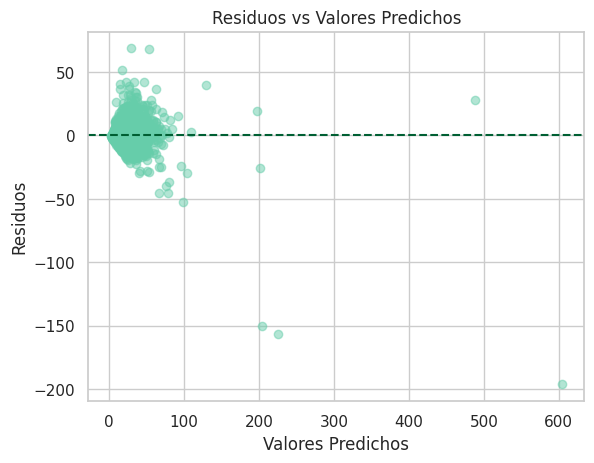

In [339]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


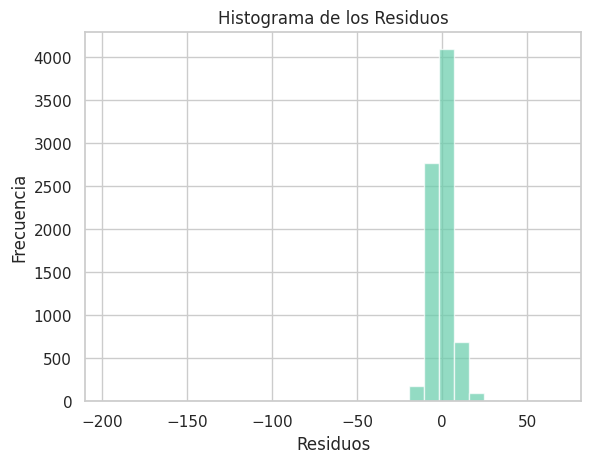

In [340]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Noroeste

In [341]:
df = noroeste.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=20,           # Profundidad máxima
    learning_rate=0.05,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 24.94%
Train MAE: 0.007449927454997202
Test MAE: 4.0232987523517405
Train Mean Squared Error: 0.00015694924402019747
Test Mean Squared Error: 35.79188756780665
Train R^2: 0.9999986336742511
Test R^2: 0.6969349603296644


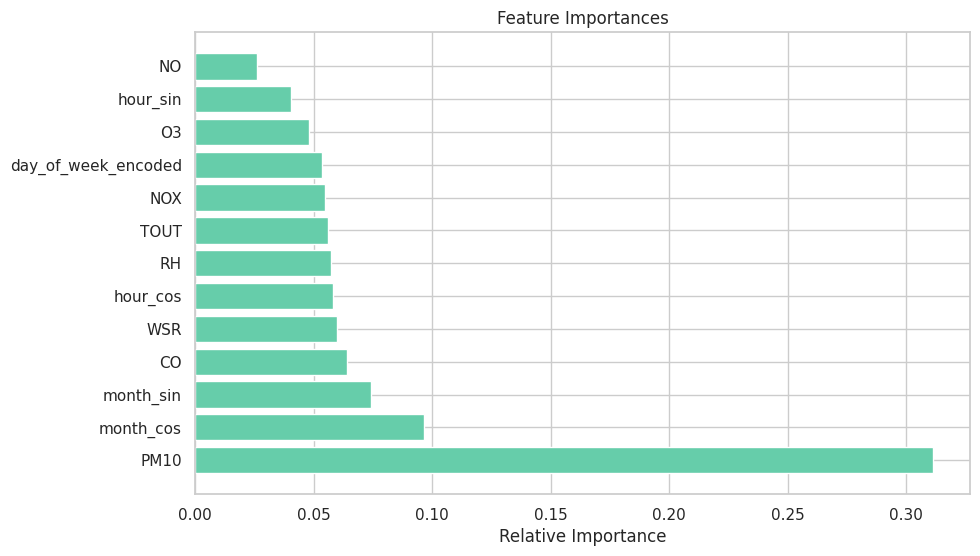

In [342]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

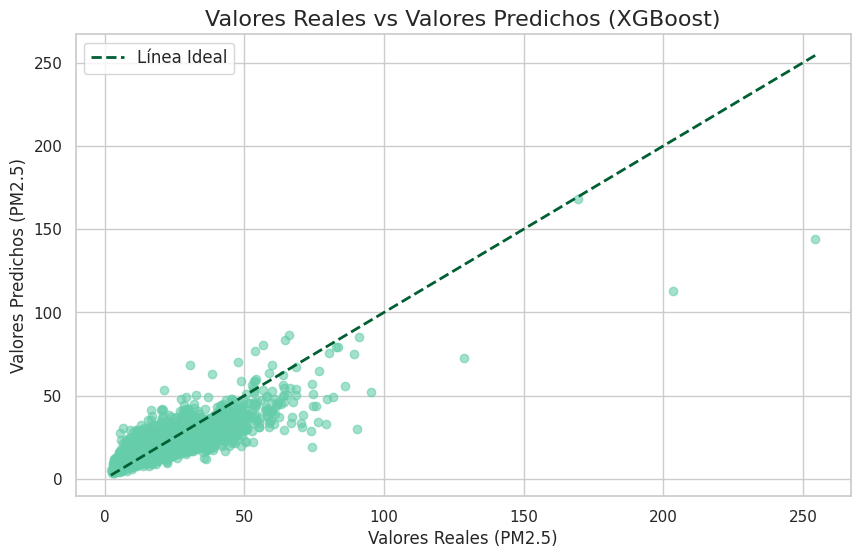

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

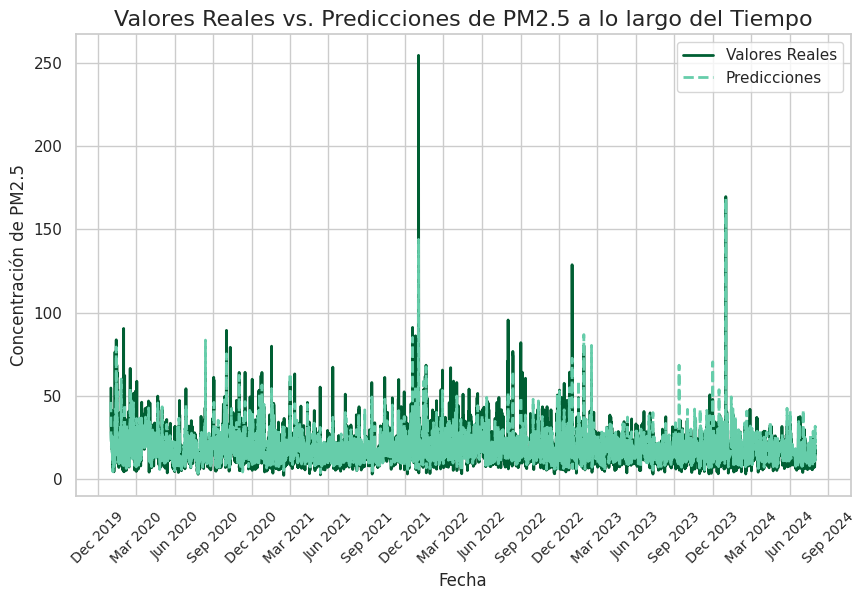

In [344]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

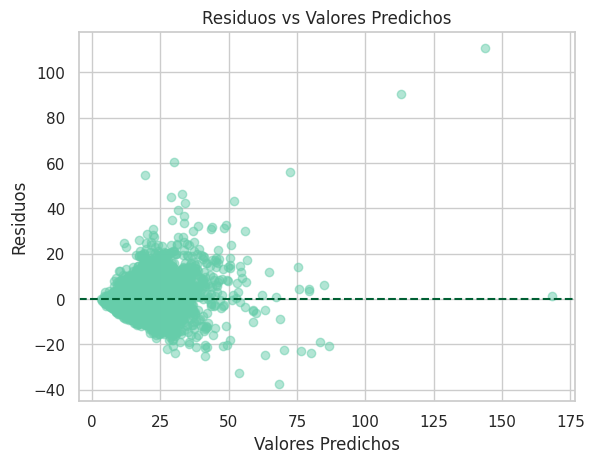

In [345]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


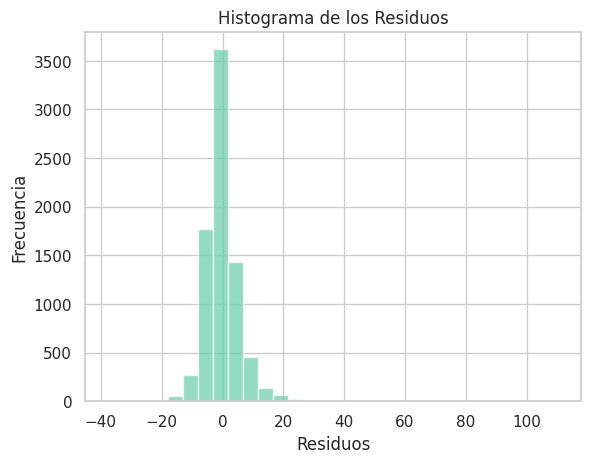

In [346]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Sur

In [347]:
df = sur.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=15,           # Profundidad máxima
    learning_rate=0.1,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 40.16%
Train MAE: 0.028033240537140028
Test MAE: 3.7164301490977656
Train Mean Squared Error: 0.0017984602213549992
Test Mean Squared Error: 35.85124577503854
Train R^2: 0.9999849759678571
Test R^2: 0.6992461835608521


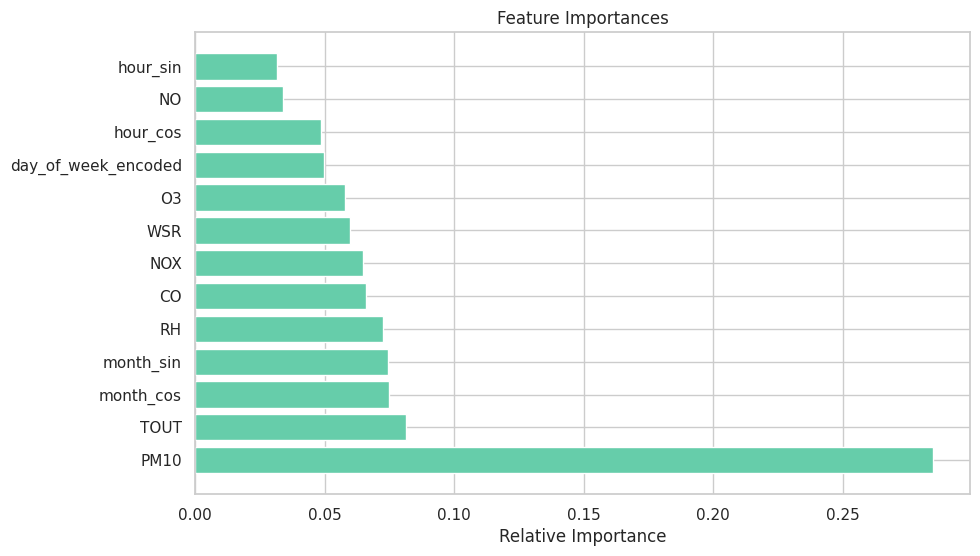

In [348]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

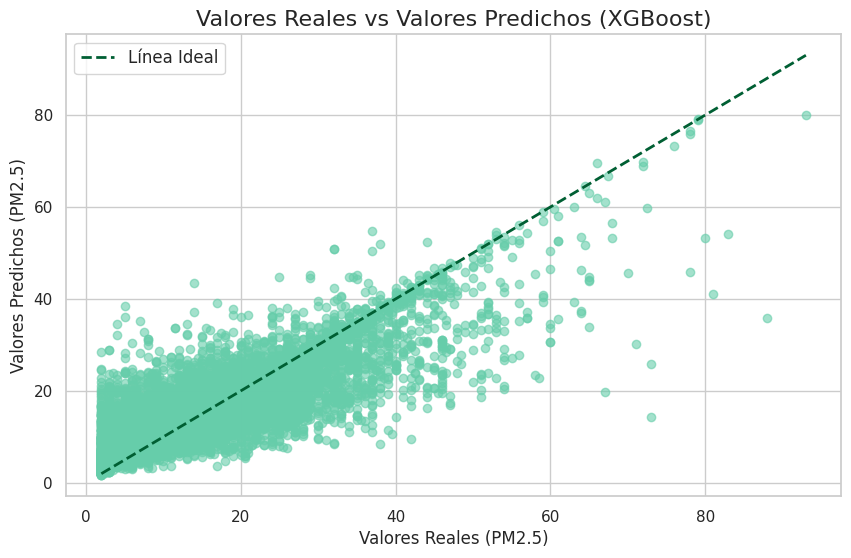

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

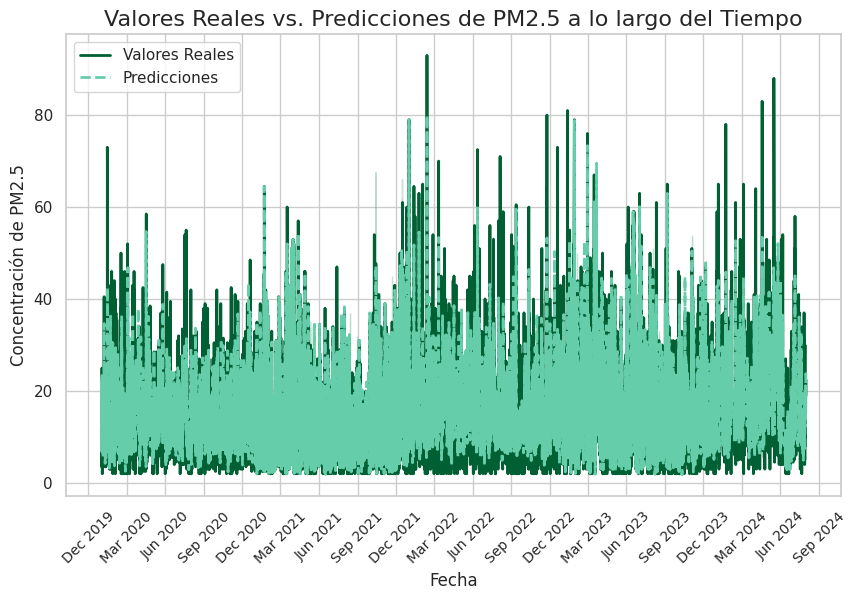

In [350]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

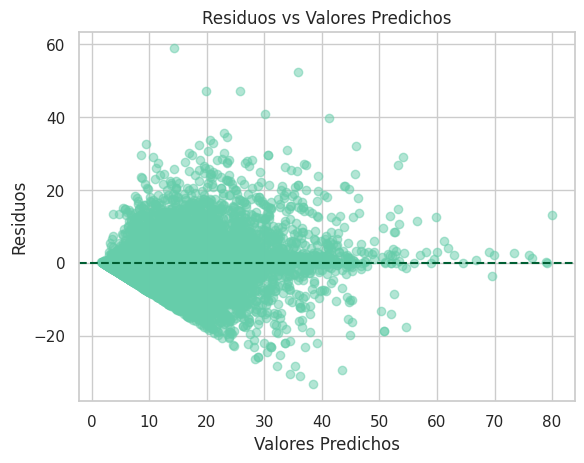

In [351]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


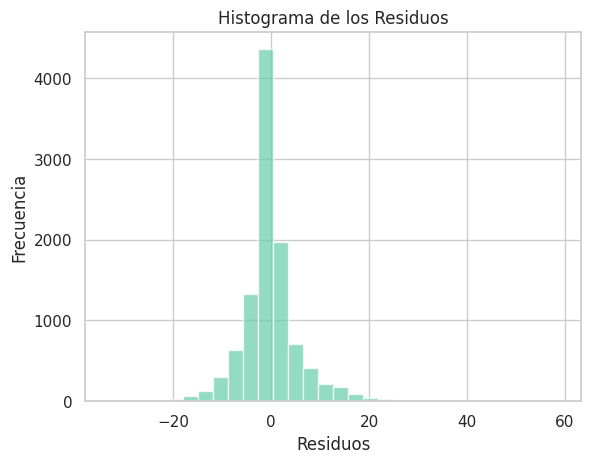

In [352]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Sureste

In [353]:
df = sureste.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=20,           # Profundidad máxima
    learning_rate=0.05,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 21.80%
Train MAE: 0.009997798347873205
Test MAE: 3.924234316685471
Train Mean Squared Error: 0.0002683119750546333
Test Mean Squared Error: 31.76779272291074
Train R^2: 0.9999985145551851
Test R^2: 0.7816481754407164


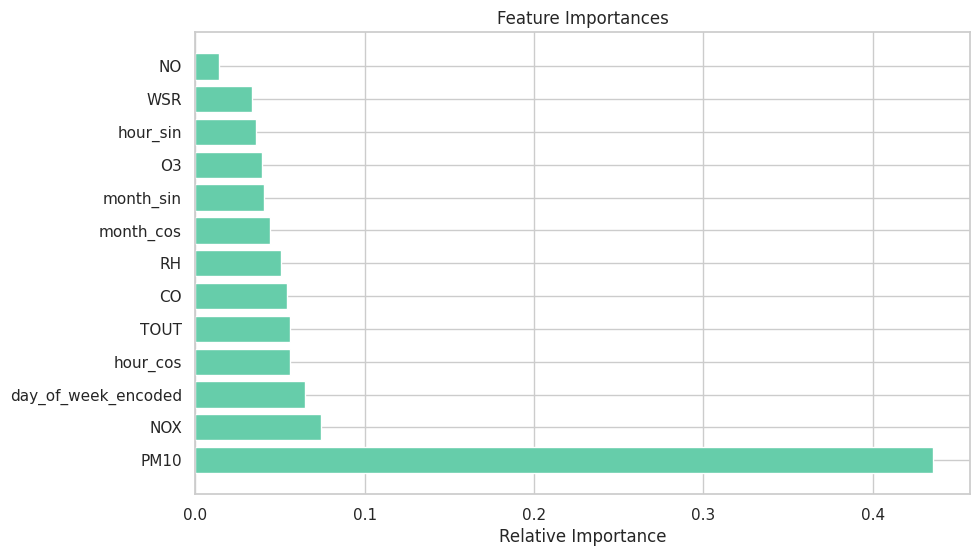

In [354]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

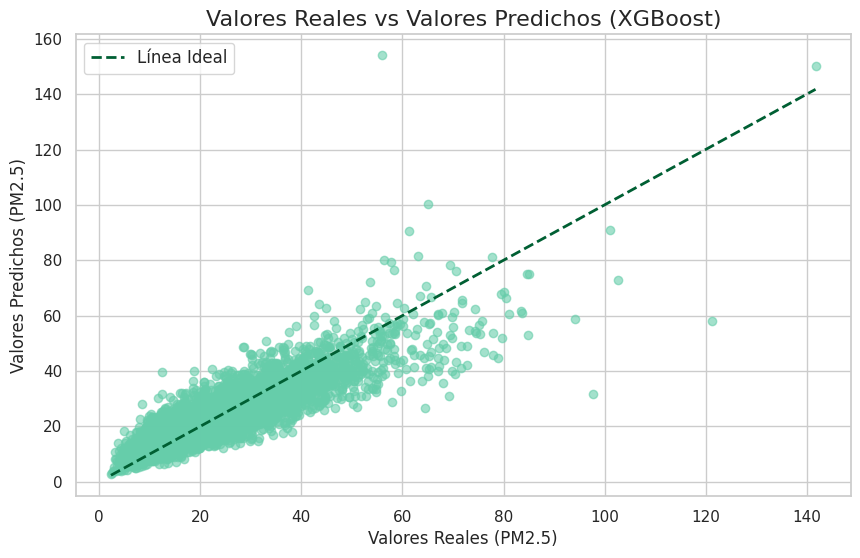

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

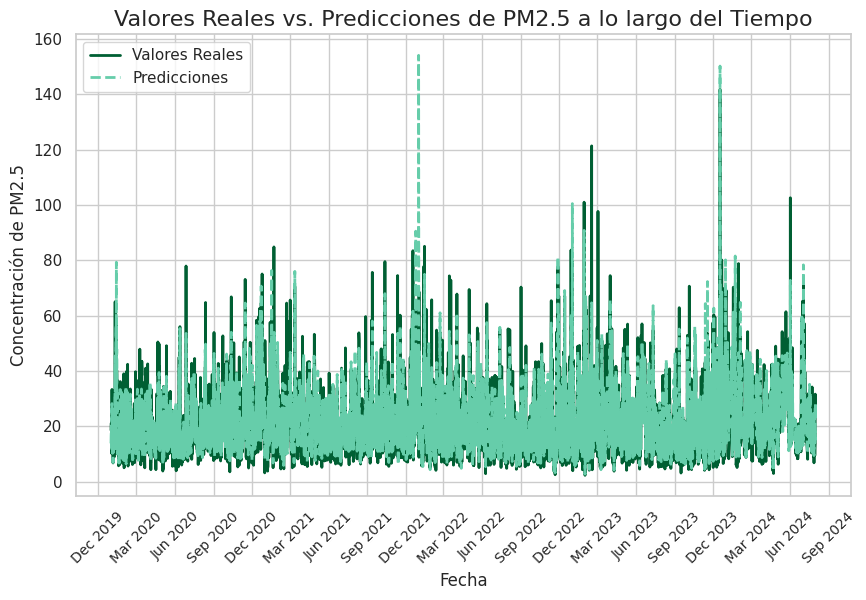

In [356]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

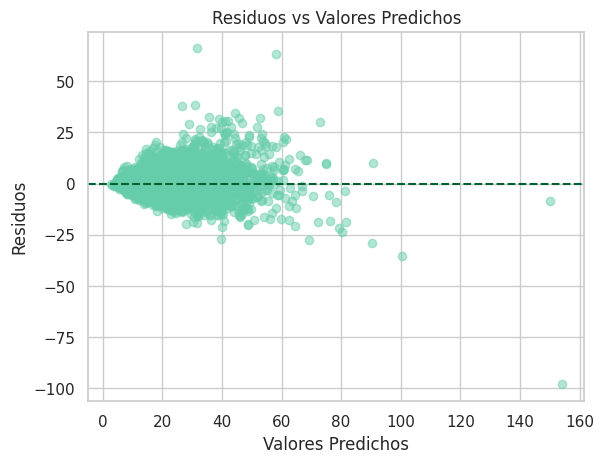

In [357]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


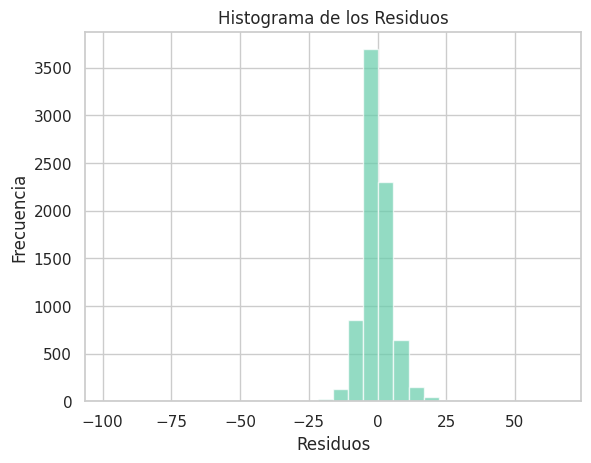

In [358]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Suroeste

In [359]:
df = suroeste.copy()

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['date'])

# Hacer un encoding para tomar en cuenta la fecha
df['day_of_week'] = df['Date'].dt.dayofweek  # Día de la semana (0: lunes, 6: domingo)
df['month'] = df['Date'].dt.month            # Mes (1: enero, ..., 12: diciembre)
df['hour'] = df['Date'].dt.hour              # Hora (0-23)

# Agregar codificaciones sinusoidales para capturar la estacionalidad
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# Encoding del día de la semana
label_encoder = LabelEncoder()
df['day_of_week_encoded'] = label_encoder.fit_transform(df['day_of_week'])

# Selección de características y objetivo
X = df[['NO', 'NOX', 'CO', 'O3', 'RH', 'TOUT', 'PM10', 'WSR',
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'day_of_week_encoded']]
y = df['PM2.5']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=300,       # Número de árboles
    max_depth=20,           # Profundidad máxima
    learning_rate=0.05,     # Tasa de aprendizaje
    subsample=0.8,          # Submuestreo
    colsample_bytree=0.8,   # Submuestreo de columnas por árbol
    random_state=42         # Semilla para reproducibilidad
)

# Entrenar el modelo
xgb_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Imprimir métricas
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Train R^2: {r2_train}")
print(f"Test R^2: {r2_test}")


Mean Absolute Percentage Error (MAPE): 23.83%
Train MAE: 0.009305778463020975
Test MAE: 4.293811137693819
Train Mean Squared Error: 0.00024812310397223685
Test Mean Squared Error: 37.86062070127959
Train R^2: 0.9999984921725074
Test R^2: 0.7564420253925953


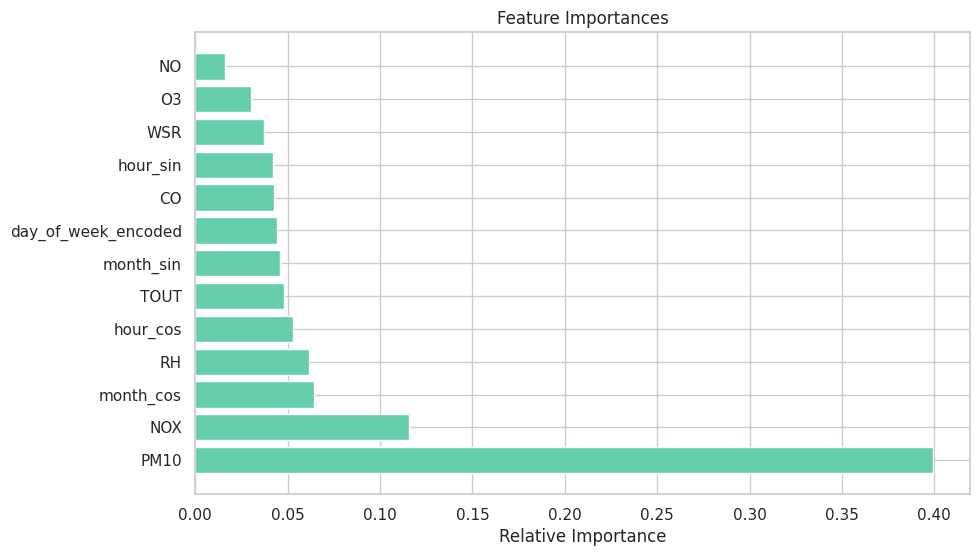

In [360]:
importances = xgb_model.feature_importances_

# Visualizar la importancia de las características
features = X.columns
indices = importances.argsort()[::-1]  # Ordenar las importancias de mayor a menor

# Visualizar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(features[indices], importances[indices], color='#66cdaa')
plt.xlabel('Relative Importance')
plt.show()

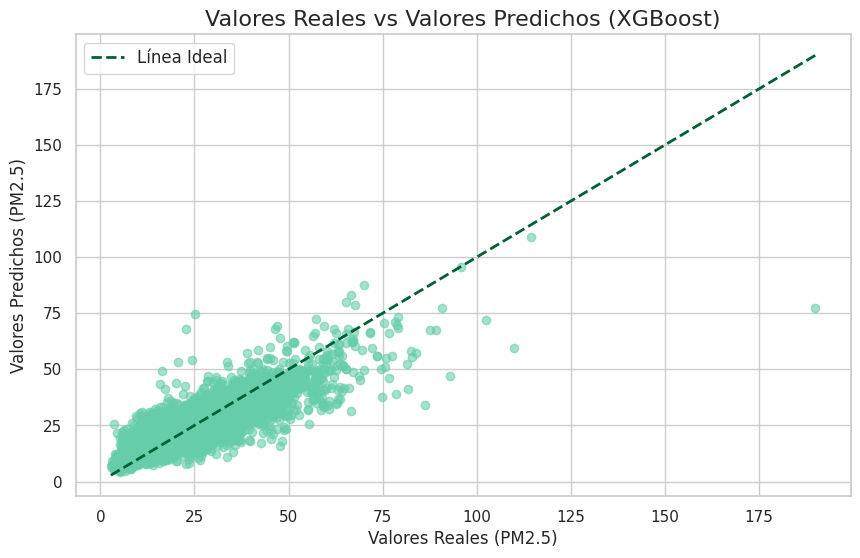

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de la gráfica
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs predichos
plt.scatter(y_test, y_pred_test, color='#66cdaa', alpha=0.6)

# Graficar la línea de identidad (idealmente, los puntos deberían caer sobre esta línea)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#005f33', linestyle='--', lw=2, label='Línea Ideal')

# Personalizar el gráfico
plt.title('Valores Reales vs Valores Predichos (XGBoost)', fontsize=16)
plt.xlabel('Valores Reales (PM2.5)', fontsize=12)
plt.ylabel('Valores Predichos (PM2.5)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)

# Mostrar la gráfica
plt.show()

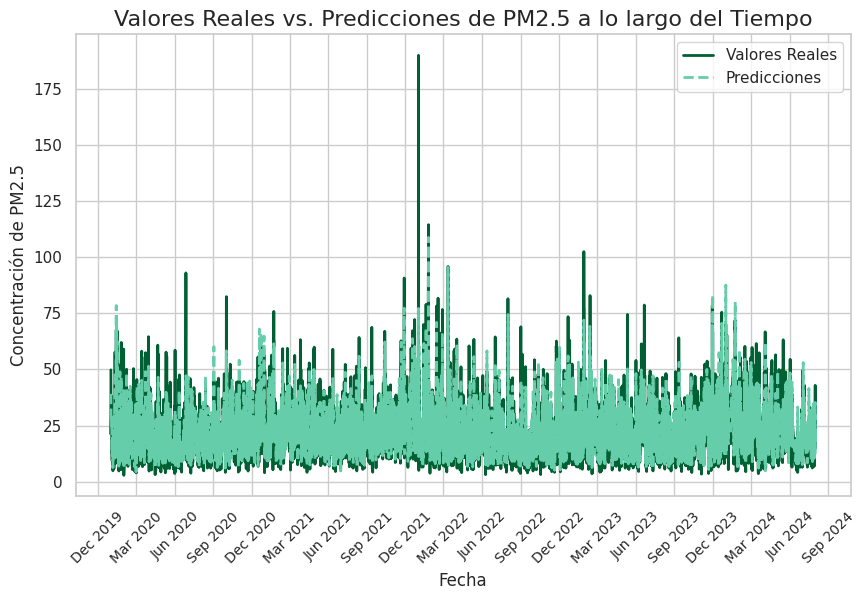

In [362]:
df_test = X_test.copy()
df_test['PM2.5_real'] = y_test
df_test['PM2.5_pred'] = y_pred_test
df_test['Date'] = df['Date'][y_test.index]  # Asegurarse de tener las fechas correctas en el conjunto de prueba

# Agrupar por trimestre
df_test['quarter'] = df_test['Date'].dt.to_period('Q')

# Graficar los valores reales vs. predicciones por trimestre
plt.figure(figsize=(10, 6))

# Graficar valores reales
sns.lineplot(x='Date', y='PM2.5_real', data=df_test, label='Valores Reales', color='#005f33', linewidth=2)

# Graficar predicciones
sns.lineplot(x='Date', y='PM2.5_pred', data=df_test, label='Predicciones', color='#66cdaa', linestyle='--', linewidth=2)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Formato de mes y año
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar un mes por etiqueta
plt.xticks(rotation=45, fontsize=10)  # Rotar y ajustar el tamaño de las etiquetas de fechas

# Personalizar el gráfico
plt.title('Valores Reales vs. Predicciones de PM2.5 a lo largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Concentración de PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

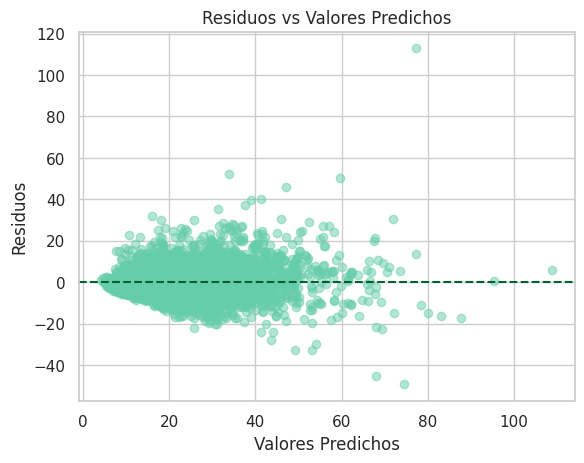

In [363]:
# Calcular los residuos
residuals = y_test - y_pred_test

# Crear gráfico de dispersión de residuos vs valores predichos
plt.scatter(y_pred_test, residuals, alpha=0.5, color='#66cdaa')
plt.axhline(y=0, color='#005f33', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()


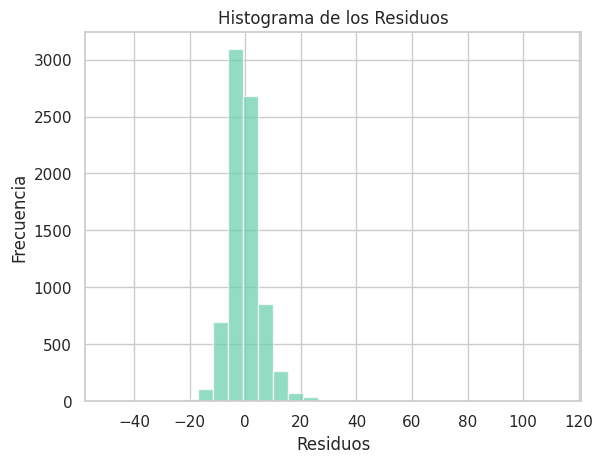

In [364]:
# Histograma de los residuos
plt.hist(residuals, bins=30, alpha=0.7, color='#66cdaa')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()